In [1]:
import os

def get_sorted_file_paths(directory):
    return sorted([os.path.join(directory, f) for f in os.listdir(directory)])

def create_path_mapping(dir1, dir2):
    files1 = get_sorted_file_paths(dir1)
    files2 = get_sorted_file_paths(dir2)
    
    min_len = min(len(files1), len(files2))
    return {files1[i]: files2[i] for i in range(min_len)}

# Example Usage
dir1 = "/teamspace/studios/this_studio/pred_transcriptions"
dir2 = "/teamspace/studios/this_studio/real_transcripts"
path_mapping = create_path_mapping(dir1, dir2)
print(path_mapping)


{'/teamspace/studios/this_studio/pred_transcriptions/Buendia - Instruccion_page_1.txt': '/teamspace/studios/this_studio/real_transcripts/Buendia_page1.txt', '/teamspace/studios/this_studio/pred_transcriptions/Buendia - Instruccion_page_2.txt': '/teamspace/studios/this_studio/real_transcripts/Buendia_page2.txt', '/teamspace/studios/this_studio/pred_transcriptions/Buendia - Instruccion_page_3.txt': '/teamspace/studios/this_studio/real_transcripts/Buendia_page3.txt', '/teamspace/studios/this_studio/pred_transcriptions/Constituciones sinodales Calahorra 1602_page_1.txt': '/teamspace/studios/this_studio/real_transcripts/Constituciones_page1.txt', '/teamspace/studios/this_studio/pred_transcriptions/Constituciones sinodales Calahorra 1602_page_2.txt': '/teamspace/studios/this_studio/real_transcripts/Constituciones_page2.txt', '/teamspace/studios/this_studio/pred_transcriptions/Constituciones sinodales Calahorra 1602_page_3.txt': '/teamspace/studios/this_studio/real_transcripts/Constituciones_

In [2]:
path_mapping.keys()

dict_keys(['/teamspace/studios/this_studio/pred_transcriptions/Buendia - Instruccion_page_1.txt', '/teamspace/studios/this_studio/pred_transcriptions/Buendia - Instruccion_page_2.txt', '/teamspace/studios/this_studio/pred_transcriptions/Buendia - Instruccion_page_3.txt', '/teamspace/studios/this_studio/pred_transcriptions/Constituciones sinodales Calahorra 1602_page_1.txt', '/teamspace/studios/this_studio/pred_transcriptions/Constituciones sinodales Calahorra 1602_page_2.txt', '/teamspace/studios/this_studio/pred_transcriptions/Constituciones sinodales Calahorra 1602_page_3.txt', '/teamspace/studios/this_studio/pred_transcriptions/Ezcaray - Vozes_page_1.txt', '/teamspace/studios/this_studio/pred_transcriptions/Ezcaray - Vozes_page_2.txt', '/teamspace/studios/this_studio/pred_transcriptions/Ezcaray - Vozes_page_3.txt', '/teamspace/studios/this_studio/pred_transcriptions/Mendo - Principe perfecto_page_1.txt', '/teamspace/studios/this_studio/pred_transcriptions/Mendo - Principe perfecto_p

In [1]:
import os
len(os.listdir('/teamspace/studios/this_studio/images'))


15010

In [ ]:
!apt-get install -y poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (184 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import os
import fitz  # PyMuPDF
from tqdm import tqdm
from PIL import Image

def pdf_to_images(pdf_path, output_folder, max_resolution=(2000, 2000), jpeg_quality=85):
    """
    Converts a PDF into images using PyMuPDF, with a resolution cap.

    Parameters:
    - pdf_path: Path to input PDF.
    - output_folder: Where to save images.
    - k: Identifier for filenames.
    - max_resolution: Maximum allowed resolution (width, height).
    - jpeg_quality: JPEG compression quality (1-100, higher = better quality).
    """
    os.makedirs(output_folder, exist_ok=True)
    pdf_name = pdf_path.split('/')[-1]
    try:
        doc = fitz.open(pdf_path)

        for i in tqdm(range(3), desc="Converting PDF to Images", unit="page"):
            page = doc.load_page(i)  # Load page
            matrix = fitz.Matrix(2.0, 2.0)  # Scale factor for high-res rendering
            pix = page.get_pixmap(matrix=matrix)  # Render page with scaling

            # Convert to PIL Image
            img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

            # Resize if larger than max_resolution
            img.thumbnail(max_resolution, Image.LANCZOS)

            # Save as JPEG to reduce size
            image_path = os.path.join(output_folder, f"{pdf_name}_pdf_page_{i+1}.jpg")
            img.save(image_path, format="JPEG", quality=jpeg_quality)

        print(f"✅ Conversion complete! Images saved in {output_folder}")

    except Exception as e:
        print(f"❌ Error processing PDF: {e}")


In [ ]:
!pip install pymupdf tqdm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 66.9 MB/s eta 0:00:00


In [ ]:

for pdf in os.listdir('/content/drive/MyDrive/OneDrive_1_3-9-2025_pdf'):
  pdf_path = os.path.join('/content/drive/MyDrive/OneDrive_1_3-9-2025_pdf', pdf)
  pdf_to_images(pdf_path, '/content/drive/MyDrive/pdf_images' )

Converting PDF to Images: 100%|██████████| 3/3 [00:00<00:00, 10.00page/s]


✅ Conversion complete! Images saved in /content/drive/MyDrive/pdf_images


Converting PDF to Images: 100%|██████████| 3/3 [00:02<00:00,  1.19page/s]


✅ Conversion complete! Images saved in /content/drive/MyDrive/pdf_images


Converting PDF to Images: 100%|██████████| 3/3 [00:00<00:00, 10.05page/s]


✅ Conversion complete! Images saved in /content/drive/MyDrive/pdf_images


Converting PDF to Images: 100%|██████████| 3/3 [00:00<00:00,  5.49page/s]


✅ Conversion complete! Images saved in /content/drive/MyDrive/pdf_images


Converting PDF to Images: 100%|██████████| 3/3 [00:06<00:00,  2.24s/page]


✅ Conversion complete! Images saved in /content/drive/MyDrive/pdf_images


Converting PDF to Images: 100%|██████████| 3/3 [00:01<00:00,  1.96page/s]

✅ Conversion complete! Images saved in /content/drive/MyDrive/pdf_images


In [ ]:
!git clone https://github.com/clovaai/CRAFT-pytorch.git

fatal: destination path 'CRAFT-pytorch' already exists and is not an empty directory.


In [ ]:
!python3 /content/CRAFT-pytorch/test.py --result_folder='/content/bbox_images' --test_folder="/content/some_images" --trained_model='/content/craft_mlt_25k.pth'

Loading weights from checkpoint (/content/craft_mlt_25k.pth)
/content/CRAFT-pytorch/test.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateD

In [ ]:
 l = os.listdir('/content/drive/MyDrive/pdf_images')

In [ ]:
l[0]

'Ezcaray - Vozes.pdf_pdf_page_1.jpg'

In [ ]:
os.path.splitext(l[0])[0]

'Ezcaray - Vozes.pdf_pdf_page_1'

In [ ]:
import cv2
import numpy as np
import os

def extract_bboxes(image_path, txt_file_path, output_folder , k):
    # Read the image
    image = cv2.imread(image_path)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    with open(txt_file_path, 'r') as file:
        lines = file.readlines()

    # Process each line (each containing a single bounding box)
    for idx, line in enumerate(lines):
        # Coordinates in the txt file are assumed to be: x1, y1, x2, y2, x3, y3, x4, y4
        coords = line.strip().split(',')

        # Convert the coordinates to integers
        pts = np.array(coords, dtype=np.int32).reshape((-1, 1, 2))

        # Create a mask to fill the region
        mask = np.zeros_like(image)

        # Create a filled polygon (bounding box) using the coordinates
        cv2.fillPoly(mask, [pts], (255, 255, 255))

        # Apply the mask to the image to extract the region inside the bounding box
        cropped_image = cv2.bitwise_and(image, mask)

        # Get the bounding box for saving the cropped image (min and max coordinates)
        x, y, w, h = cv2.boundingRect(pts)
        cropped_image = cropped_image[y:y+h, x:x+w]

        # Save the cropped image
        cropped_image_path = os.path.join(output_folder, f'{k}_cropped_{idx+1}.png')
        cv2.imwrite(cropped_image_path, cropped_image)

        print(f"Saved cropped image: {cropped_image_path}")

    print("Cropped images saved successfully.")


In [ ]:
for i in os.listdir('/content/drive/MyDrive/pdf_images'):
  img_path = os.path.join('/content/drive/MyDrive/pdf_images', i)
  txt_path = os.path.join('/content/drive/MyDrive/bbox_images', "bbox_imagesres_" + os.path.splitext(i)[0] + ".txt")
  extract_bboxes(img_path, txt_path, '/content/drive/MyDrive/bbox_split_images' , os.path.splitext(i)[0])

Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_1.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_2.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_3.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_4.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_5.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_6.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_7.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_8.png
Saved cropped image: /content/drive/MyDrive/bbox_split_images/Ezcaray - Vozes.pdf_pdf_page_1_cropped_9.png
Saved cropped image: /content/drive/M

New code


Rodrigo dataset


In [1]:
import pandas as pd

def load_image_paths(file_path):
    """Load image paths from a txt file."""
    with open(file_path, "r") as f:
        return [line.strip() for line in f.readlines()]

def load_transcriptions(transcription_file):
    """Load transcriptions from the transcription txt file and return a dictionary mapping image paths to transcriptions."""
    transcription_dict = {}
    with open(transcription_file, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split(" ", 1)  # Split into image path and transcription
            if len(parts) == 2:
                image_path, transcription = parts
                transcription_dict[image_path] = transcription
    return transcription_dict

def create_dataframe(image_paths, transcription_dict):
    """Create a DataFrame with image paths and their transcriptions."""
    data = {"image_path": image_paths, "transcription": [transcription_dict.get(img, "") for img in image_paths]}
    return pd.DataFrame(data)

# File paths
train_txt = "/teamspace/studios/this_studio/train.txt"
val_txt = "/teamspace/studios/this_studio/validation.txt"
test_txt = "/teamspace/studios/this_studio/test.txt"
transcription_txt = "/teamspace/studios/this_studio/transcriptions.txt"

# Load data
train_paths = load_image_paths(train_txt)
val_paths = load_image_paths(val_txt)
test_paths = load_image_paths(test_txt)
transcriptions = load_transcriptions(transcription_txt)

# Create DataFrames
df_train = create_dataframe(train_paths, transcriptions)
df_val = create_dataframe(val_paths, transcriptions)
df_test = create_dataframe(test_paths, transcriptions)
df_train = pd.concat([df_train , df_test] , ignore_index = True)


In [2]:
df_train.head()

,image_path,transcription
0,Rodrigo_00006_00,Historia De España_Del
1,Rodrigo_00006_01,Arçobispo. Do Rodri_
2,Rodrigo_00006_02,go. Traducida En Ro_
3,Rodrigo_00006_03,mançe
4,Rodrigo_00008_00,E ste es el libro de la Cronica de es


In [3]:
len(df_train)

14010

In [4]:
len(df_val)

1000

VRD dataset

In [5]:
df_vrd = pd.read_csv('/teamspace/studios/this_studio/GEN_IMAGES_DF.csv')

In [6]:
df_vrd.head()

,Unnamed: 0,path,text
0,0,image_5_1.png,Nunca ofendí la fe con la esperanza;
1,1,image_0_1.png,"Valencia insigne, patria venturosa,"
2,2,image_12_1.png,"Clarín, que rosicleres troglodita,"
3,3,image_11_1.png,"Tiemble la tierra, y con furor horrendo"
4,4,image_3_1.png,"De tu muerte que fue un breve suspiro,"


In [7]:
df_vrd = df_vrd.drop(columns = ['Unnamed: 0'])
df_vrd = df_vrd.rename(columns={'path': 'image_path' , 'text' : 'transcription'})


In [8]:
df_vrd.head()

,image_path,transcription
0,image_5_1.png,Nunca ofendí la fe con la esperanza;
1,image_0_1.png,"Valencia insigne, patria venturosa,"
2,image_12_1.png,"Clarín, que rosicleres troglodita,"
3,image_11_1.png,"Tiemble la tierra, y con furor horrendo"
4,image_3_1.png,"De tu muerte que fue un breve suspiro,"


In [9]:
len(df_vrd)

15368

In [10]:
df_vrd_val = df_vrd.sample(frac = 0.05 , random_state = 42)
df_vrd_train = df_vrd.drop(df_vrd_val.index)

In [11]:
len(df_vrd_val)

768

In [12]:
df_val_final = pd.concat([df_val ,df_vrd_val] , ignore_index = True ).sample(frac=1, random_state=42).reset_index(drop=True)
df_train_final = pd.concat([df_train , df_vrd_train] , ignore_index = True).sample(frac=1, random_state=42).reset_index(drop=True)

final Dataframes

In [13]:
len(df_train_final)

28610

In [14]:
df_train_final.head()

,image_path,transcription
0,Rodrigo_00491_11,doña vrraca e doña Eluira. E porque doña vrrac...
1,Rodrigo_00189_21,aqui sino A morir mala muerte. tornad vos para...
2,Rodrigo_00182_01,astraguemos e pues no son nrōs yguales en Arma...
3,Rodrigo_00536_01,"cho. E veyendo los condes qe el rei, lo vno co..."
4,image_270_1.png,"Ya Flori sale el campo, todo es flores,"


In [15]:
len(df_val_final)

1768

In [16]:
df_val_final.head()

,image_path,transcription
0,Rodrigo_00407_06,ouo al ynfante don Ordoño y de la otra ouo a l...
1,Rodrigo_00121_16,es Verdadera creencia y verdadera Regla de chr...
2,Rodrigo_00180_13,67 ¶ Agora cuenta la historia de
3,Rodrigo_00399_12,don Ermigio obispo de tui e martiriaronlo En c...
4,Rodrigo_00217_07,la espina de la sebe qe se mette por el pie o ...


In [17]:
import re
import spacy

# Load spaCy's Spanish language model
nlp = spacy.load("es_core_news_md")

def is_valid_spanish_word(word):
    """Check if a word exists in modern Spanish using spaCy."""
    lexeme = nlp.vocab[word]
    return lexeme.is_oov == False  # If False, the word is in the vocabulary

def modify_u_v(word):
    """Try replacing 'v' with 'u' or vice versa and check if the word exists in Spanish."""
    if is_valid_spanish_word(word):
        return word  # If the word is already valid, return as is

    # Try replacing 'v' with 'u' and check again
    modified_word = word.replace('v', 'u').replace('V' , 'U')
    if is_valid_spanish_word(modified_word):
        return modified_word

    # Try replacing 'u' with 'v' and check again
    modified_word = word.replace('u', 'v').replace('U' , 'V')
    if is_valid_spanish_word(modified_word):
        return modified_word

    return word  # If no valid modification, return original word

def preprocess_text(text):
    # Normalize 'ſ' (long s) to 's'
    text = text.replace('ſ', 's')

    # Tokenize text into words
    words = text.split()

    # Modify 'u' and 'v' based on dictionary lookup
    processed_words = [modify_u_v(word) for word in words]

    # Reconstruct text
    text = ' '.join(processed_words)

    # Remove accents except for 'ñ'
    text = re.sub(r'(?<!ñ)[áàâä]', 'a', text)
    text = re.sub(r'(?<!ñ)[éèêë]', 'e', text)
    text = re.sub(r'(?<!ñ)[íìîï]', 'i', text)
    text = re.sub(r'(?<!ñ)[óòôö]', 'o', text)
    text = re.sub(r'(?<!ñ)[úùûü]', 'u', text)

    # Replace macrons with appropriate expansion
    text = re.sub(r'([aeiou])̄', r'\1n', text)  # Replace vowels with macrons with 'n'
    text = re.sub(r'q̄', 'que', text)  # Replace 'q̄' with 'que'

    # Leave split words as is
    text = text.replace('-\n', '\n')

    # Replace 'ç' with 'z'
    text = text.replace('ç', 'z')

    return text


In [19]:
preprocess_text('doña vrraca e doña Eluira. E porque doña vrraca era sa')

'doña urraca e doña Eluira. E porque doña urraca era sa'

In [20]:
df_train_final.iloc[0]['transcription']

'doña vrraca e doña Eluira. E porque doña vrraca era sa'

In [21]:
df_train_final['transcription'] = df_train_final['transcription'].apply(preprocess_text)
df_val_final['transcription'] = df_val_final['transcription'].apply(preprocess_text)

In [22]:
df_train_final.iloc[0]['transcription']

'doña urraca e doña Eluira. E porque doña urraca era sa'

In [23]:
nlp.vocab['queue'].is_oov

False

In [24]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import os

def preprocess_image(image):
    """Prepares image by applying adaptive thresholding, noise removal, and inversion."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    

    # Adaptive Thresholding
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 5, 5)
    # _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to filter out small components
    mask = np.zeros_like(binary)

    # Keep only larger contours
    for cnt in contours:
        if cv2.contourArea(cnt) > 5:  # Adjust threshold based on noise size
            cv2.drawContours(mask, [cnt], -1, 255, thickness=cv2.FILLED)

    # Apply mask to original image
    binary = cv2.bitwise_and(binary, mask)                               

    # Remove small noise using connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary , connectivity=8)
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area < 5:  # Threshold for noise removal
            binary[labels == i] = 0

    # Invert image
    processed = cv2.bitwise_not(binary)

    return processed

def remove_borders(image):
    """Removes borders from scanned documents using edge and line detection."""
    if len(image.shape) == 3:  # Check if image has color channels
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]

    # Detect horizontal and vertical lines
    kernel_h = np.ones((1, 50), np.uint8)
    kernel_v = np.ones((50, 1), np.uint8)

    horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_h)
    vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_v)

    # Combine detected lines
    lines = cv2.addWeighted(horizontal_lines, 0.5, vertical_lines, 0.5, 0)

    # Detect strong lines using Hough Transform
    edges = cv2.Canny(lines, 50, 150, apertureSize=3)
    lines_detected = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=200, maxLineGap=5)

    mask = np.ones_like(binary) * 255  # White background
    if lines_detected is not None:
        for line in lines_detected:
            x1, y1, x2, y2 = line[0]
            cv2.line(mask, (x1, y1), (x2, y2), 0, 3)  # Draw detected lines in black

    # Dilate and subtract the mask from the original image
    mask = cv2.dilate(mask, np.ones((5, 5), np.uint8), iterations=2)
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

def enhance_sharpness(image):
    """Enhances the sharpness of the image using PIL."""
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Sharpness(pil_image)
    enhanced_image = enhancer.enhance(2)  # Increase sharpness factor
    return cv2.cvtColor(np.array(enhanced_image), cv2.COLOR_RGB2BGR)


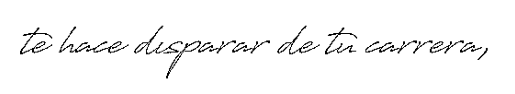

In [25]:
import matplotlib.pyplot as plt
img_path = '/teamspace/studios/this_studio/GEN_IMAGES/image_1_2.png'
image = cv2.imread(img_path)
preprocessed = preprocess_image(image)
# borderless = remove_borders(preprocessed)
sharpened_img = enhance_sharpness(preprocessed)
plt.imshow(sharpened_img, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
image.shape

(81, 540, 3)

In [27]:
from transformers import TrOCRProcessor, AutoTokenizer, VisionEncoderDecoderModel
processor = TrOCRProcessor.from_pretrained("qantev/trocr-base-spanish" , use_fast = True)
model = VisionEncoderDecoderModel.from_pretrained("qantev/trocr-base-spanish")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decode

In [28]:
processor.tokenizer.vocab_size

50265

In [29]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                            Param #
VisionEncoderDecoderModel                                         --
├─ViTModel: 1-1                                                   --
│    └─ViTEmbeddings: 2-1                                         443,904
│    │    └─ViTPatchEmbeddings: 3-1                               590,592
│    │    └─Dropout: 3-2                                          --
│    └─ViTEncoder: 2-2                                            --
│    │    └─ModuleList: 3-3                                       85,026,816
│    └─LayerNorm: 2-3                                             1,536
│    └─ViTPooler: 2-4                                             --
│    │    └─Linear: 3-4                                           590,592
│    │    └─Tanh: 3-5                                             --
├─TrOCRForCausalLM: 1-2                                           --
│    └─TrOCRDecoderWrapper: 2-5                                   --
│  

In [30]:
processor

TrOCRProcessor:
- image_processor: ViTImageProcessorFast {
  "crop_size": null,
  "default_to_square": true,
  "do_center_crop": null,
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessorFast",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "processor_class": "TrOCRProcessor",
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

- tokenizer: RobertaTokenizerFast(name_or_path='qantev/trocr-base-spanish', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, n

In [31]:
processor.tokenizer.pad_token_id

1

Already configured acc to the tokenizer

In [32]:
from peft import LoraConfig, get_peft_model
config = LoraConfig(
    r=32,  # Rank (adjust as needed)
    lora_alpha=16,  # Scaling factor
    lora_dropout=0.1,  # Dropout for LoRA layers
    target_modules=[
        "query" , "value" , "q_proj" , "v_proj"
    ]
)
# Apply LoRA
model = get_peft_model(model, config)

In [33]:
model

PeftModel(
  (base_model): LoraModel(
    (model): VisionEncoderDecoderModel(
      (encoder): ViTModel(
        (embeddings): ViTEmbeddings(
          (patch_embeddings): ViTPatchEmbeddings(
            (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
          )
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (encoder): ViTEncoder(
          (layer): ModuleList(
            (0-11): 12 x ViTLayer(
              (attention): ViTSdpaAttention(
                (attention): ViTSdpaSelfAttention(
                  (query): lora.Linear(
                    (base_layer): Linear(in_features=768, out_features=768, bias=False)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (default): Linear(in_features=768, out_features=32, bias=False)
                    )
                    (lora_B): ModuleDict(
         

In [34]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                                      Param #
PeftModel                                                                   --
├─LoraModel: 1-1                                                            --
│    └─VisionEncoderDecoderModel: 2-1                                       --
│    │    └─ViTModel: 3-1                                                   87,833,088
│    │    └─TrOCRForCausalLM: 3-2                                           301,258,752
Total params: 389,091,840
Trainable params: 4,227,072
Non-trainable params: 384,864,768

In [35]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters())
print(f"Trainable Parameters: {trainable_params}/{total_params} ({100 * trainable_params/total_params:.2f}%)")


Trainable Parameters: 4227072/389091840 (1.09%)


In [36]:
import torch.nn as nn
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.decoder.config.vocab_size = processor.tokenizer.vocab_size
model.config.vocab_size = model.decoder.config.vocab_size
model.config.eos_token_id = processor.tokenizer.sep_token_id

In [37]:
from transformers import GenerationConfig

# Define a generation configuration
gen_config = GenerationConfig(
    max_length=64,
    early_stopping=True,
    no_repeat_ngram_size=3,
    length_penalty=2.0,
    num_beams=4
)


In [38]:
def preprocessing(img_path):
  image = cv2.imread(img_path)
  preprocessed = preprocess_image(image)
  # borderless = remove_borders(preprocessed)
  sharpened_img = enhance_sharpness(preprocessed)
  pixel_values = processor(sharpened_img, return_tensors="pt").pixel_values.squeeze()
  return pixel_values

In [39]:
preprocessing(img_path).shape

torch.Size([3, 384, 384])

In [40]:
# dir = r'D:\humanai\pdf_images'
# output_dir = "new_binarized_images"
# os.makedirs(output_dir, exist_ok=True)


# for i in os.listdir(dir):
#     input_image_path = os.path.join(dir , i)
#     # Read the image
#     image = cv2.imread(input_image_path)

#     # Apply processing steps
#     # deskewed = deskew_image(image)
#     preprocessed = preprocess_image(image)
#     borderless = remove_borders(preprocessed)
#     sharpened = enhance_sharpness(borderless)

#     # Split double pages if detected
#     pages = split_double_page(sharpened)

#     # Save processed images
#     for idx, page in enumerate(pages):
#         output_path = os.path.join(output_dir, f"processed_{i.split('.')[0]}_{idx + 1}.jpg")
#         cv2.imwrite(output_path, page)
#         print(f"Processed image saved: {output_path}")

In [41]:
from torch.utils.data import DataLoader , Dataset
from torch.nn.utils.rnn import pad_sequence
import torch
class SpanishDocumentsDataset(Dataset):
    def __init__(self, df , processor):
        self.df = df
        self.processor = processor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        try:
            image_path = self.df.iloc[idx]['image_path']
            if image_path[0] == "R":
                image_path = os.path.join( '/teamspace/studios/this_studio/images', image_path) + '.png'
            else:
                image_path = os.path.join( '/teamspace/studios/this_studio/GEN_IMAGES', image_path) 
            pixel_values = preprocessing(image_path)
            text = self.df.iloc[idx]['transcription']
            labels = self.processor.tokenizer(text, return_tensors="pt").input_ids.squeeze()
            # labels[labels == self.processor.tokenizer.pad_token_id] = -100
            return {"pixel_values": pixel_values, "labels": labels}
        except Exception as e:
            raise Exception(f"Failed to load data for index {idx}: {e}")

In [42]:
def custom_collate_fn(batch):
    try:
        pixel_values = [item['pixel_values'] for item in batch]
        labels = [item['labels'] for item in batch]
        labels = pad_sequence(labels, batch_first=True, padding_value= processor.tokenizer.pad_token_id)
        pixel_values = torch.stack(pixel_values)
        return {"pixel_values": pixel_values, "labels": labels}
    except Exception as e:
        raise Exception(f"Failed to collate batch: {e}")

In [43]:
train_dataset = SpanishDocumentsDataset(df_train_final, processor)
val_dataset = SpanishDocumentsDataset(df_val_final, processor)

In [33]:
# Dummy image input
pixel_values = torch.rand(1, 3, 384, 384)  # Batch size 1, RGB image

# Generate decoder inputs (empty start token)
decoder_input_ids = torch.tensor([[model.config.decoder_start_token_id]])

# Forward pass
outputs = model(pixel_values=pixel_values, decoder_input_ids=decoder_input_ids)

# Logits
print(outputs.logits.shape)

torch.Size([1, 1, 50262])


In [44]:
b_size = 32

In [45]:
train_dataloader = DataLoader(train_dataset, batch_size=b_size, shuffle=True, collate_fn=custom_collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=b_size, shuffle=False, collate_fn=custom_collate_fn)
# test_dataloader = DataLoader(test_dataset, batch_size=b_size, shuffle=False, collate_fn=custom_collate_fn)

In [46]:
for batch in train_dataloader:
    print(batch)
    break

{'pixel_values': tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1

In [46]:
from datasets import load
import evaluate
import Levenshtein
# from nltk.translate.bleu_score import sentence_bleu

cer_metric = evaluate.load("cer")
wer_metric = evaluate.load("wer")
bleu = evaluate.load("sacrebleu")

# def prec_rec(preds, labels):
#     correct_count = 0
#     total_tokens_pred = 0
#     total_tokens_gt = 0

#     for gt, pred in zip(labels, preds):
#         gt_tokens = gt.split()  # Convert string to list of words
#         pred_tokens = pred.split()  

#         min_len = min(len(gt_tokens), len(pred_tokens))  # Compare only up to the shorter length
#         correct_count += sum(1 for i in range(min_len) if gt_tokens[i] == pred_tokens[i])
        
#         total_tokens_gt += len(gt_tokens)  # Use ground truth length for recall
#         total_tokens_pred += len(pred_tokens)  # Use predicted length for precision

#     pr = correct_count / total_tokens_pred if total_tokens_pred else 0
#     re = correct_count / total_tokens_gt if total_tokens_gt else 0
#     f1_score = 2 * pr * re / (pr + re) if (pr + re) else 0

    # return pr, re, f1_score

def compute_metrics(eval_pred):
    try:
        # Compute Character Error Rate (CER) and Word Error Rate (WER)
        decoded_preds , decoded_labels = eval_pred
        cer = cer_metric.compute(predictions=decoded_preds, references=decoded_labels)
        wer = wer_metric.compute(predictions=decoded_preds, references=decoded_preds)

        # Compute BLEU Score
        bleu_score = bleu.compute(predictions=decoded_preds, references=[[ref] for ref in decoded_labels], smooth_method="exp")

        # Compute Precision, Recall, F1-score
        # pr, re, f1_score = prec_rec(preds=decoded_preds, labels=decoded_labels)

        return {
            "cer": cer,
            "wer": wer,
            "Bleu": bleu_score['score'],
        }

    except Exception as e:
        raise Exception(f"Failed to compute metrics: {e}")


In [46]:
len(train_dataloader)

895

In [47]:
import torch
from torch.utils.data import DataLoader
from transformers import VisionEncoderDecoderModel
from tqdm import tqdm
import random

# Training function
# def train_epoch(model, dataloader, optimizer, device, scheduler, grad_accum_steps=4):
#     model.train()
#     total_loss = 0.0

#     optimizer.zero_grad()
#     progress_bar = tqdm(dataloader, desc="Training", leave=False)

#     for step, batch in enumerate(progress_bar):  # Use the same tqdm instance
#         pixel_values = batch["pixel_values"].to(device)
#         input_ids = batch["labels"][:, :-1].to(device).contiguous()
#         labels = batch["labels"][:, 1:].to(device).contiguous()

#         outputs = model(pixel_values=pixel_values, decoder_input_ids=input_ids).logits
#         loss_fn = torch.nn.CrossEntropyLoss(ignore_index=processor.tokenizer.pad_token_id)
#         loss = loss_fn(outputs.view(-1, outputs.size(-1)), labels.view(-1))
#         loss /= grad_accum_steps  # Normalize loss for gradient accumulation

#         loss.backward()
#         total_loss += loss.item() * grad_accum_steps

#         if (step + 1) % grad_accum_steps == 0:
#             optimizer.step()
#             scheduler.step()
#             optimizer.zero_grad()

#         # Dynamically update loss in tqdm progress bar
#         progress_bar.set_postfix(loss=f"{loss.item() * grad_accum_steps:.4f}")

#     return total_loss / len(dataloader)


# Evaluation function
# def evaluate(model, dataloader, device):
#     model.eval()
#     val_loss = 0.0
#     predictions, references = [], []
#     with torch.no_grad():
#         progress_bar = tqdm(dataloader, desc="Evaluating", leave=False)

#         for batch in tqdm(dataloader, desc="Evaluating"):
#             pixel_values = batch["pixel_values"].to(device)
#             input_ids = batch["labels"][:,:-1].to(device).contiguous()
#             labels = batch["labels"][:,1:].to(device).contiguous()

#             outputs = model(pixel_values=pixel_values, decoder_input_ids=input_ids).logits
#             # outputs = torch.argmax(outputs , dim = -1).squeeze()
#             loss_fn = torch.nn.CrossEntropyLoss(ignore_index = processor.tokenizer.pad_token_id)
#             loss = loss_fn(outputs.view(-1,outputs.size[-1]) , labels.view(-1))
#             loss /= grad_accum_steps
#             outputs_g = model.generate(pixel_values=pixel_values, max_length=50)
#             decoded_preds = processor.tokenizer.batch_decode(outputs_g, skip_special_tokens=True)
#             decoded_labels = processor.tokenizer.batch_decode(labels, skip_special_tokens=True)

#             metric = compute_metrics((outputs , labels))

#             predictions.extend(decoded_preds)
#             references.extend(decoded_labels)
#             val_loss += loss.item() * grad_accum_steps
#             progress_bar.set_postfix(val_loss=loss.item() * grad_accum_steps)

#         return metric , predictions, references , val_loss / len(dataloader)

# Training loop
def train_model(model, train_dataloader, val_dataloader, optimizer, device,scheduler, epochs=5, grad_accum_steps=1):
    
    train_l = []
    eval_l = []
    wer = []
    cer = []
    bleu = []
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")

        # Training
        model.train()
        total_loss = 0.0

        optimizer.zero_grad()
        progress_bar = tqdm(train_dataloader, desc="Training", leave=False)

        for step, batch in enumerate(progress_bar):  # Use the same tqdm instance
            pixel_values = batch["pixel_values"].to(device)
            input_ids = batch["labels"][:, :-1].to(device).contiguous()
            labels = batch["labels"][:, 1:].to(device).contiguous()

            outputs = model(pixel_values=pixel_values, decoder_input_ids=input_ids).logits
            loss_fn = torch.nn.CrossEntropyLoss(ignore_index=processor.tokenizer.pad_token_id)
            loss = loss_fn(outputs.view(-1, outputs.size(-1)), labels.view(-1))
            loss /= grad_accum_steps  # Normalize loss for gradient accumulation

            loss.backward()
            total_loss += loss.item() * grad_accum_steps
            train_l.append(loss.item() * grad_accum_steps)

            if (step + 1) % grad_accum_steps == 0:
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()

            # Dynamically update loss in tqdm progress bar
            progress_bar.set_postfix(loss=f"{loss.item() * grad_accum_steps:.4f}")
        train_loss =  total_loss / len(train_dataloader)
        
        print(f"Training Loss: {train_loss:.4f}")

        # Validation
        model.eval()
        val_loss = 0.0
        wer_v = 0
        cer_v = 0
        bleu_v = 0
        predictions, references = [], []
        with torch.no_grad():
            progress_bar = tqdm(val_dataloader, desc="Evaluating", leave=False)

            for batch in progress_bar :
                pixel_values = batch["pixel_values"].to(device)
                input_ids = batch["labels"][:,:-1].to(device).contiguous()
                labels = batch["labels"][:,1:].to(device).contiguous()

                outputs = model(pixel_values=pixel_values, decoder_input_ids=input_ids).logits
                # outputs = torch.argmax(outputs , dim = -1).squeeze()
                loss_fn = torch.nn.CrossEntropyLoss(ignore_index = processor.tokenizer.pad_token_id)
                loss = loss_fn(outputs.view(-1,outputs.size(-1)) , labels.view(-1))
                loss /= grad_accum_steps
                outputs_g = model.generate(pixel_values=pixel_values, generation_config=gen_config)
                decoded_preds = processor.tokenizer.batch_decode(outputs_g, skip_special_tokens=True)
                decoded_labels = processor.tokenizer.batch_decode(labels, skip_special_tokens=True)

                metric = compute_metrics((decoded_preds , decoded_labels))

                predictions.extend(decoded_preds)
                references.extend(decoded_labels)
                wer.append(metric['wer'])
                cer.append(metric['cer'])
                bleu.append(metric['Bleu'])
                val_loss += loss.item() * grad_accum_steps
                wer_v +=metric['wer']
                cer_v += metric['cer']
                bleu_v += metric['Bleu']
                eval_l.append(loss.item() * grad_accum_steps)
                progress_bar.set_postfix(val_loss=loss.item() * grad_accum_steps , wer = metric['wer'] , cer = metric['cer'] , bleu = metric['Bleu'] )

            val_loss =  val_loss / len(val_dataloader)
            wer_v /= len(val_dataloader)
            cer_v /= len(val_dataloader)
            bleu_v /= len(val_dataloader)
        
        

        print(f"val Loss: {val_loss:.4f} , wer : {wer_v:.4f} , cer : {cer_v:.4f} , bleu_score : {bleu_v:.4f} ")

        # Print sample predictions
        # Ensure there are at least three samples
        num_samples = min(3, len(decoded_preds))

        # Select three random indices
        random_indices = random.sample(range(len(decoded_preds)), num_samples)

        # Print the selected samples
        for i in random_indices:
            print(f"Pred: {decoded_preds[i]}")
            print(f"Ref: {decoded_labels[i]}\n")

        # Save model checkpoint
        save_path = f"/teamspace/studios/this_studio/2nd_qantev_model"
        os.makedirs(save_path, exist_ok=True)  # Ensure directory exists

        # Save only model weights
        torch.save(model.state_dict(), os.path.join(save_path, f"model_checkpoint_epoch_{epoch+1}.pth"))

    return train_l , eval_l , wer , cer , bleu 


In [48]:
# Initialize model, optimizer, and dataloaders
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_new = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, 
    T_0=1,  # Number of epochs before the first restart
    T_mult=2,  # Multiplicative factor for the restart period
    eta_min=1e-6  # Minimum learning rate
)


In [49]:
# Assuming train_dataloader and val_dataloader are already created
train_l , eval_l , wer , cer , bleu = train_model(model, train_dataloader, val_dataloader, optimizer, device,scheduler, epochs=10, grad_accum_steps=4)


Epoch 1/10


Training Loss: 1.2957


val Loss: 0.7138 , wer : 0.0000 , cer : 0.0996 , bleu_score : 54.1187 
Pred: Taz, las brabras y aunque alimentura,
Ref: Trago las brasas, y aunque alla sintieron

Pred: y el planeta, que nunca para, dora
Ref: y el planeta, que nunca para, dora

Pred: ¡Al miño de amor fiestas celebra,
Ref: Al milagro de amor fiestas celebra,


Epoch 2/10


Training Loss: 0.7375


val Loss: 0.5700 , wer : 0.0000 , cer : 0.0736 , bleu_score : 63.3751 
Pred: Al mismo de amor, fiestas celebra,
Ref: Al milagro de amor fiestas celebra,

Pred: y el planeta, que nunca para, dora
Ref: y el planeta, que nunca para, dora

Pred: y de las ondas se escapo el piloto,
Ref: y de las ondas se escapo el piloto,


Epoch 3/10


Training Loss: 0.6020


val Loss: 0.5141 , wer : 0.0000 , cer : 0.0662 , bleu_score : 66.5271 
Pred: y el planeta, que nunca para, dora
Ref: y el planeta, que nunca para, dora

Pred: Al mirio de amor, fiestas celebra,
Ref: Al milagro de amor fiestas celebra,

Pred: Juez fue home muy paciente e sabidor y entendi
Ref: Juez fue home muy paciente e sabidor y entendi


Epoch 4/10


Training Loss: 0.5014


val Loss: 0.4562 , wer : 0.0000 , cer : 0.0579 , bleu_score : 70.0939 
Pred: y de las ondas se escapo el piloto,
Ref: y de las ondas se escapo el piloto,

Pred: pues tambien veene a ser aplraso tego,
Ref: pues tambien viene a ser aplauso tuyo.

Pred: Al mirio de amor, fiestas celebra,
Ref: Al milagro de amor fiestas celebra,


Epoch 5/10


Training Loss: 0.4588


val Loss: 0.4737 , wer : 0.0000 , cer : 0.0610 , bleu_score : 68.9387 
Pred: y si es de noche, luego nace el dia
Ref: y si es de noche, luego nace el dia;

Pred: de dos soles que en gloria juzgo iguales
Ref: de dos soles que en gloria juzgo iguales,

Pred: Juez fue home muy paciente e sabidor y entendi
Ref: Juez fue home muy paciente e sabidor y entendi


Epoch 6/10


Training Loss: 0.4616


val Loss: 0.4349 , wer : 0.0000 , cer : 0.0574 , bleu_score : 71.1043 
Pred: y si es de noche, luego nace el dia,
Ref: y si es de noche, luego nace el dia;

Pred: Taga, las bienes y amor, alli sintiene,
Ref: Trago las brasas, y aunque alla sintieron

Pred: pues tambien viene a ser aplraso tego,
Ref: pues tambien viene a ser aplauso tuyo.


Epoch 7/10


Training Loss: 0.3969


val Loss: 0.4026 , wer : 0.0000 , cer : 0.0515 , bleu_score : 73.3556 
Pred: y el planeta, que nunca para, dora
Ref: y el planeta, que nunca para, dora

Pred: y de las ondas se escapo el piloto,
Ref: y de las ondas se escapo el piloto,

Pred: de dos soles que en gloria fuzgo iguales
Ref: de dos soles que en gloria juzgo iguales,


Epoch 8/10


Training Loss: 0.3389


val Loss: 0.3842 , wer : 0.0000 , cer : 0.0487 , bleu_score : 74.1700 
Pred: y el planeta, que nunca para, dora
Ref: y el planeta, que nunca para, dora

Pred: Al mirio de amor, fiestas celebra,
Ref: Al milagro de amor fiestas celebra,

Pred: y si es de noche, luego nace el dia,
Ref: y si es de noche, luego nace el dia;


Epoch 9/10


Training Loss: 0.3085


val Loss: 0.3782 , wer : 0.0000 , cer : 0.0478 , bleu_score : 74.8427 
Pred: pues tambien veene a ser aplraso tego,
Ref: pues tambien viene a ser aplauso tuyo.

Pred: de dos soles que en gloria fuzgo iguales
Ref: de dos soles que en gloria juzgo iguales,

Pred: y de las ondas se escapo el piloto,
Ref: y de las ondas se escapo el piloto,


Epoch 10/10


Training Loss: 0.3674


val Loss: 0.4210 , wer : 0.0000 , cer : 0.0544 , bleu_score : 71.8305 
Pred: y le las ondas se escapo el piloto,
Ref: y de las ondas se escapo el piloto,

Pred: de dos soles que en gloria juzgo iguales
Ref: de dos soles que en gloria juzgo iguales,

Pred: Al mirio de amor, fiestas celebra,
Ref: Al milagro de amor fiestas celebra,

